# CMSE 802 In-class assignment: Pandas
## Date: 11/20/2018
## Due: 11/20/2018; 10:30 PM

### The goal of this assignment is to do data exploring and munging with Pandas.

---
### Your name: Boyao Zhu

<img src = "http://www.boostability.com/wp-content/uploads/2014/09/Panda-Update.jpg"  width="60%"/>

---
**About the Company:**
Dream Housing Finance deals in  home loans. They have presence across all urban, semi urban and rural areas. Customers  apply for a home loan after being validated as eligibe.



**Problem: **
To automate the loan eligibility process (real time) based on customer details, provided while filling an online application form. 

source: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

---
### Data

| Variable | Description |
|----------|-------------|
|Loan_ID | Unique Loan ID|
|Gender |Male/ Female
|Married |Applicant married (Y/N)
|Dependents|Number of dependents
|Education|Applicant Education (Graduate/ Not Graduate)
|Self_Employed|Self employed (Y/N)
|Applicant_Income|Applicant income
|Coapplicant_Income|Coapplicant income
|Loan_Amount|Loan amount in thousands
|Loan_Amount_Term|Term of loan in months
|Credit_History|credit history meets guidelines
|Property_Area|Urban/ Semi Urban/ Rural
|Loan_Status|Loan approved (Y/N)

---

We begin by loading the data as well as the appropriate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("loan_data_Train.csv")

---
### Activity 1

Use the methods head( ) and describe( ) to answer the questions below.

In [19]:
# your code
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [54]:
# Your code
df.apply(lambda x: sum(x.isnull()),axis=0)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

** Questions** 
1. How many missing (NaN or NULL) values are there in each numeric column (ApplicantIncom, etc.)
1. What percentage of applicants do not have, or did not report, credit history?
1. What do you think are the three variables which most reliably predict Loan_Status?

** your answers: **
1. There are 13 elements in Gender are missing, 3 in Married, 15 in Dependents, 32 in Self_Employed, 22 in LoanAmount, 14 in Loan_Amount_Term, and 50 in Credit_History
1. 50/64
1. Credit_History, ApplicantImcome and Property_Area


---
### Activity 2:

value_counts( ) is a useful summarizing method for Series; it calculates the number of unique values (numbers or text): 

In [23]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

**Question:** How many applicants did not report gender?

In [25]:
# Your code:
Gd = df['Gender']
Gd.value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

**Your answer: ** 604 - 489 - 112 = 3

---
### Activity 3:

Let us now dive into the distributions of some of our variables.

We begin by plotting a histogram of the values for the variable (Series) ApplicantIncome:

** Do this: ** Select an appropriate number of bins to visualize the distribution

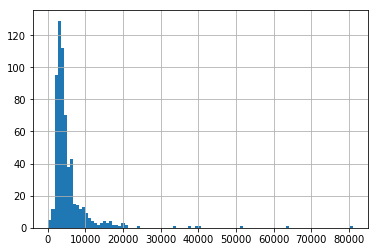

In [34]:
df['ApplicantIncome'].hist(bins= 100 )

** Question: ** The distribution exhibits extreme values; is this something we need to address in order to fit a model later? If so, how?

**Your answer:** exclude null values

Boxplots with whiskers (https://en.wikipedia.org/wiki/Box_plot) is another way of visualizing the distribution (quantiles, mean, extreme values):

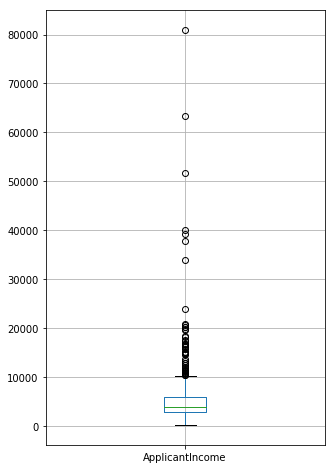

In [35]:
df.boxplot(column='ApplicantIncome', figsize = (5,8),return_type='axes')

And one can see, for instance, how a variable's distribution splits with respect to the values of another one:

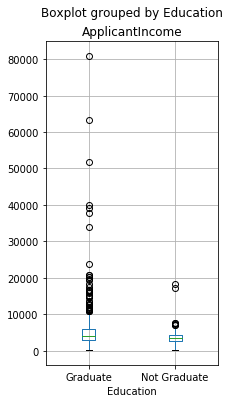

In [36]:
df.boxplot(column='ApplicantIncome', figsize = (3, 6), by = 'Education')

Notice that though the median income for grads and not grads is essentially the same, the graduate income has a wider range of values (which is to be expected) and more extreme outliers.

** Question ** Is there a substancial difference between the median income of males and females ?

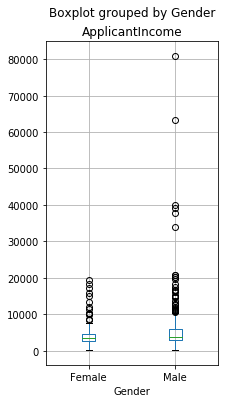

In [37]:
# Your code:
df.boxplot(column='ApplicantIncome', figsize = (3, 6), by = 'Gender')


**Your answer: ** the median income for Male and Female is essentially the same, Male income has a wider range of values (which is to be expected) and more extreme outliers.

**Question:** Is it true that if one has a very high income, then the loan will be automatically approved?

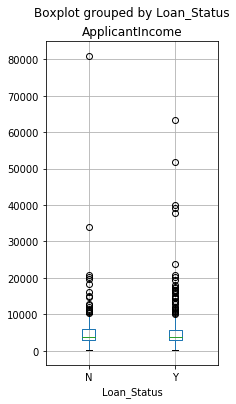

In [38]:
# your code

df.boxplot(column='ApplicantIncome', figsize = (3, 6), by = 'Loan_Status')

**Your answer: ** No, I don't see that trendency

** Question: ** In average, who attempts to borrow more money -- men or women?

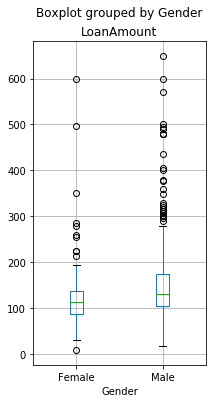

In [39]:
# your code
df.boxplot(column='LoanAmount', figsize = (3, 6), by = 'Gender')


**Your answer:** In average, men tend to borrow more money

The relations between variables is another important factor: having several highly-correlated variables makes the model more high-dimensional than what it needs to be, which then requires more data in order to navigate the variance/bias tradeoff.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11918c9e8>,
      dtype=object)

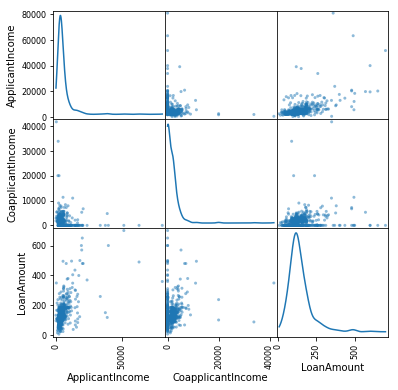

In [40]:
pd.tools.plotting.scatter_matrix(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']],   figsize=(6, 6), diagonal='kde')


Two variables with low correlation yield a plot which looks like a blob, while highly-correlated variables have plots with more structure. https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg

---

### Digression: Lambda expressions

Lambda expressions provide the syntactic means for defining anonymus functions in python. Think of how you'd define a function which squares a number. With lambda expressions this is accomplished as follows: 

In [41]:
f = lambda x : x**2   # <== fill the blank

f(2)

4

Mapping and filtering add a lot of functionality to lambda expressions. Please see the link below for more information:

http://www.python-course.eu/lambda.php


---
### Activity 4:

Let us explore the incidence of having credit history on your chances of getting a loan.

For more information on pivot tables please visit: https://en.wikipedia.org/wiki/Pivot_table

In [42]:
print('Frequency Table for Credit History:') 
freqCredit = df['Credit_History'].value_counts(ascending=True)
print(freqCredit)

print('\nProbility of getting loan for each Credit History class:')
probCreditHist =  df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print(probCreditHist)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


The same information can be visualized as a bar chart:

Text(0.5,1,'Probability of getting a loan by credit history')

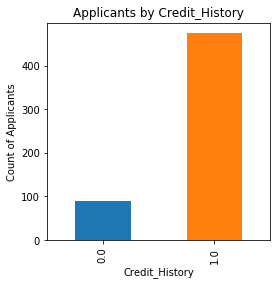

<Figure size 288x288 with 0 Axes>

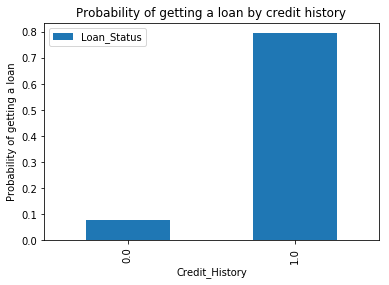

In [43]:
plt.figure(1,figsize=(4,4))

freqCredit.plot(kind='bar')
plt.xlabel('Credit_History')
plt.ylabel('Count of Applicants')
plt.title('Applicants by Credit_History')


plt.figure(2,figsize=(4,4))
probCreditHist.plot(kind ='bar')
plt.xlabel('Credit_History')
plt.ylabel('Probability of getting a loan')
plt.title('Probability of getting a loan by credit history')

And even more informative: Let us see a crosstab plot with the portion of people getting a loan depending on their credit history.

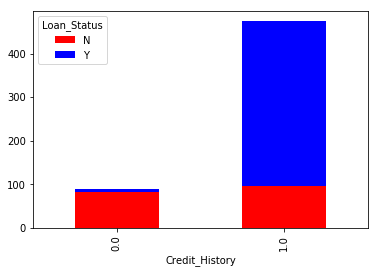

In [44]:
temp = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

**Do this:** Make a bar chart describing the probability of getting a loan depending on marital status.

In [45]:
# your code

probMaritalStatus = df.pivot_table(values='Loan_Status', index=['Married'], aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())



In [46]:
probMaritalStatus

,Loan_Status
Married,
No,0.629108
Yes,0.716080


Text(0.5,1,'Probability of getting a loan by marital status')

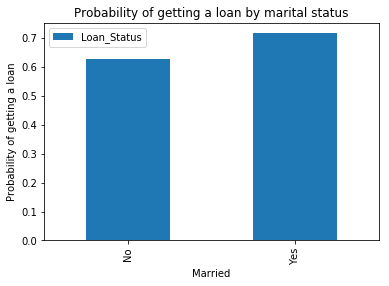

In [47]:
probMaritalStatus.plot(kind = 'bar')

plt.xlabel('Married')
plt.ylabel('Probability of getting a loan')
plt.title('Probability of getting a loan by marital status')


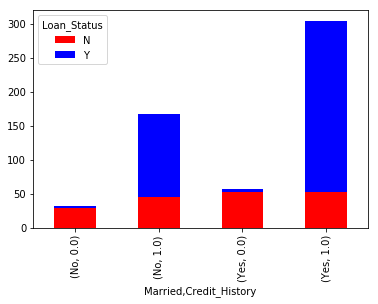

In [48]:
temp = pd.crosstab([ df['Married'], df['Credit_History']] , df['Loan_Status'])
temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

**Question:** What can you conclude regarding the relative importance of the non-numeric variables?

**Your answer:**  It is hard to interpret the correlation between non-numeric variables. and for me, it is also hard to understand including plot

---
### Activity 5:

While exploring the data we found a few problems that need to be resolved before we can fit a model. This exercise is typically referred to as “Data Munging”. Here are some problems we are already aware of:

1. There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of the variable.
1. While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, they should be treated appropriately.

In addition to these problems with numerical fields, we should also look at the non-numerical fields i.e. Gender, Property_Area, Married, Education and Dependents to see if they contain any useful information.

In [49]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Note**: Remember that missing values may not always be NaNs. For instance, if the Loan_Amount_Term is 0, does it makes sense or would you consider that missing? I suppose your answer is missing and you’re right. So we should check for values which are unpractical.

There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:

In [55]:
 df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

Let's check whether it worked:

In [56]:
 df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The other extreme could be to do model fitting for each variable, using the other variables and/or additional information. 

** Do this: ** Complete the other ones

In [75]:
# Your code
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['Gender'].fillna(np.random.choice(['Male','Female']),inplace=True)
df['Married'].fillna(np.random.choice(['Yes','No']),inplace=True)
df['Dependents'].fillna(np.random.choice([1,0]),inplace=True)
df['Self_Employed'].fillna(np.random.choice(['Yes','No']),inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Do this:** Deal with extreme values.

In [84]:
# Your code

#df[df.apply(lambda x: np.abs(x-x.mean())/x.std()<3).all(axis=0)]
df[((df['LoanAmount']-df['LoanAmount'].mean())/df['LoanAmount'].std())<3]
df[((df['ApplicantIncome']-df['ApplicantIncome'].mean())/df['ApplicantIncome'].std())<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban,N


---

Finally, let us save the fruits of our labor. 

In [87]:
df.to_csv('./loan_data_Train_clean.csv')

---
### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20181120".